In [251]:
import numpy as np
import matplotlib.pyplot as plt

In [252]:
# intial parameters
n_iter = 150
sz = [n_iter,2] # size of array
x =  np.ones(sz) # truth value 

In [253]:
T = 1 # sec

In [254]:
A = np.array([[1, T],[0, 1]])

In [255]:
A

array([[1, 1],
       [0, 1]])

In [256]:
xn = x

initial conditions

In [257]:
xn[0] = xn[0]* [1500, -2.5]

In [258]:
for k in range(1,n_iter):
    xn[k] = A.dot(xn[k - 1].T)   

Noising signal

In [259]:
z = numpy.random.normal(xn, 0.5, size=sz) # observations (normal about x, sigma=0.1)

In [260]:
xhat = numpy.zeros(sz)      # a posteri estimate of x
P = numpy.zeros(sz)         # a posteri error estimate
xhatminus = numpy.zeros(sz) # a priori estimate of x
Pminus = numpy.zeros(sz)    # a priori error estimate
K = numpy.zeros(sz)         # gain or blending factor

In [289]:
Q = np.array([1e-1, 1e-2])

In [325]:
R = np.array([0.5**2, 0.7**2]) 

In [326]:
# intial guesses
xhat[0] = [0.0 , 0.0]
P[0] = [1.0, 1.0]

In [327]:
for k in range(1,n_iter):
    # time update
    xhatminus[k] = A.dot(xhat[k-1])
    Pminus[k] = P[k-1] + Q
    # measurement update
    K[k] = Pminus[k] / ( Pminus[k] + R )
    xhat[k] = xhatminus[k] + K[k] * (z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

In [328]:
plt.figure()

In [329]:
plt.plot(xn,'g*',label='real')
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='a posteri estimate')

In [330]:
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Position+Velocity')

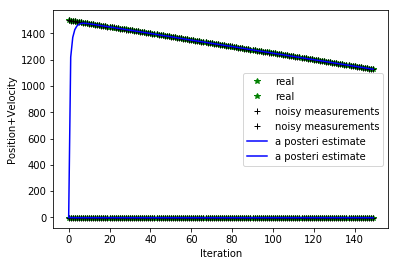

In [331]:
plt.show()

In [332]:
plt.figure()

Not bad...

In [333]:
err = xhat - xn

In [334]:
plt.plot(err[20:,0],'r',label='error(Position)')
plt.plot(err[20:,1],'b',label='error(Velocity)')
plt.grid(True)

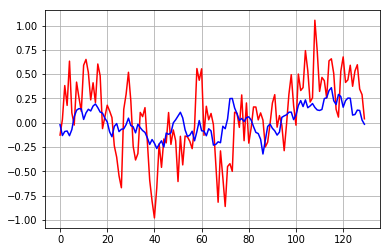

In [335]:
plt.show()

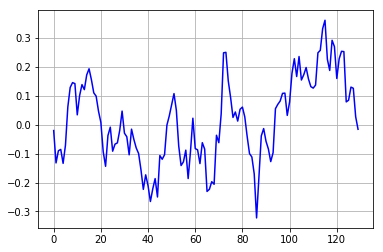

In [336]:
plt.plot(err[20:,1],'b',label='error(Velocity)')
plt.grid(True)
plt.show()